In [2]:
import matplotlib.pyplot as plt

def plot_action_cruve(file_name):
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                  
    
    plt.plot(action_values)

In [3]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

### 目前设定
#### 奖励函数
```
reward=-min(abs(self.target_z-pose.position.z),5)
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
        if pose.position.z==self.target_z:
            reward+=100*(self.target_hit)**2+5
            self.target_hit+=1
        if pose.position.z > self.height_limit:
            reward-=500
            done=True
        if timestamp > self.max_duration:
            done=True
```
#### Actor和Critic模型  
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(400-300)
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（400-300）+ actions:300

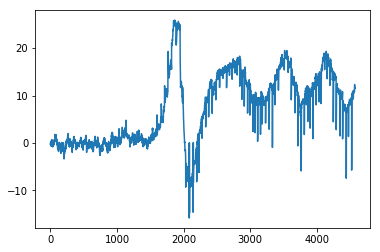

In [3]:
plot_action_cruve("actions_hover_01.txt")

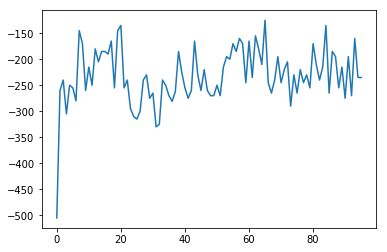

In [4]:
plot_rewards("rewards_hover_01.txt")

#### 调整奖励函数  
去除起飞时间限制和飞行高度上限


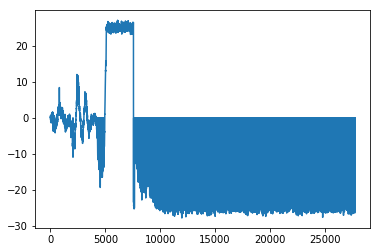

In [11]:
plot_action_cruve("actions_01.txt")

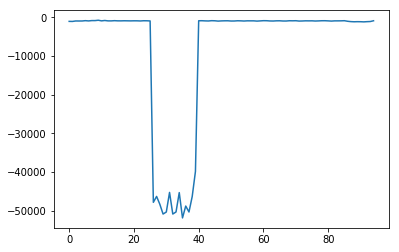

In [12]:
plot_rewards("rewards_01.txt")

* 起飞时间限制调为7秒，飞行高度上限调值到30（额外惩罚加达到-700）

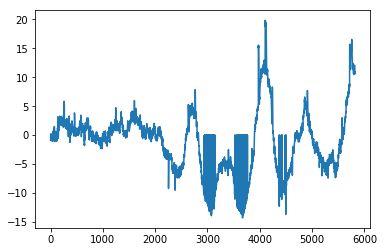

In [5]:
plot_action_cruve("actions_03.txt")

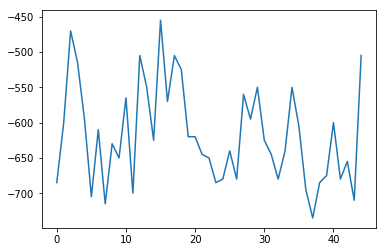

In [6]:
plot_rewards("rewards_03.txt")

* Actor的Adam优化器lr调高到0.0003

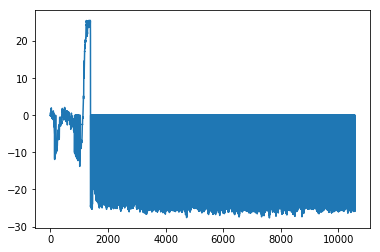

In [7]:
plot_action_cruve("actions_04.txt")

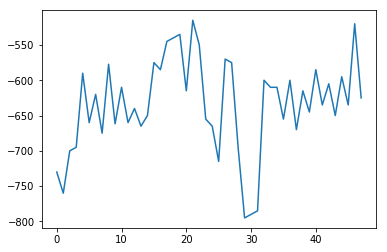

In [8]:
plot_rewards("rewards_04.txt")

#### 分析
* 在原有基础上调整奖励函数（取消限制或调高限制），或调整Adam学习率的效果均不理想    
因此返回原有设定